### Loading the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### setting the option to display all rows

In [2]:
pd.set_option('display.max_rows',None)

### Loading the data

In [3]:
data = pd.read_csv('train.csv')

### Top 5 rows

In [4]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Dataframe shape

In [5]:
data.shape

(1460, 81)

### checking null values

In [6]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Heatmap: Null values

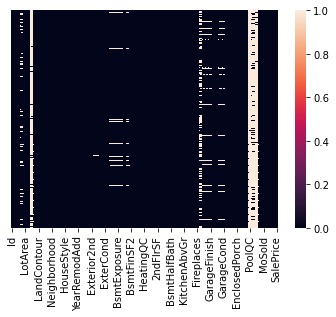

In [9]:
sns.heatmap(data.isnull(),yticklabels=False)
plt.show()

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
#https://stackoverflow.com/a/26937531/12991246

from texttable import Texttable

t = Texttable()
t.add_rows([['S.No','Feature', 'Feature type'], 
                [1, 'LotFrontage', 'Numerical'], 
                [2, 'BsmtQual', 'Categorical'],
                [3, 'BsmtCond', 'Categorical'],
                [4, 'BsmtExposure', 'Categorical'],
                [5, 'BsmtFinType1','Categorical'],
                [6, 'BsmtFinType2','Categorical'],
                [7, 'FireplaceQu','Categorical'],
                [8, 'GarageType','Categorical'],
                [9, 'GarageYrBlt','Numerical'],
                [10, 'GarageFinish','Categorical'],
                [11, 'GarageQual','Categorical'],
                [12, 'GarageCond','Categorical'],
                [13, 'Electrical','Categorical'],
                [14, 'MasVnrType','Categorical'],
                [15, 'MasVnrArea','Numerical'],
               ])
print(t.draw())

+------+--------------+--------------+
| S.No |   Feature    | Feature type |
+======+==============+==============+
| 1    | LotFrontage  | Numerical    |
+------+--------------+--------------+
| 2    | BsmtQual     | Categorical  |
+------+--------------+--------------+
| 3    | BsmtCond     | Categorical  |
+------+--------------+--------------+
| 4    | BsmtExposure | Categorical  |
+------+--------------+--------------+
| 5    | BsmtFinType1 | Categorical  |
+------+--------------+--------------+
| 6    | BsmtFinType2 | Categorical  |
+------+--------------+--------------+
| 7    | FireplaceQu  | Categorical  |
+------+--------------+--------------+
| 8    | GarageType   | Categorical  |
+------+--------------+--------------+
| 9    | GarageYrBlt  | Numerical    |
+------+--------------+--------------+
| 10   | GarageFinish | Categorical  |
+------+--------------+--------------+
| 11   | GarageQual   | Categorical  |
+------+--------------+--------------+
| 12   | GarageCond   | C

## Handling Missing Values

### 1.1. LotFrontage

In [10]:
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].mean())

### 1.2. BsmtQual

In [11]:
data['BsmtQual'] = data['BsmtQual'].fillna(data['BsmtQual'].mode()[0])

### 1.3. BsmtCond

In [12]:
data['BsmtCond'] = data['BsmtCond'].fillna(data['BsmtCond'].mode()[0])

### 1.4. BsmtExposure

In [13]:
data['BsmtExposure'] = data['BsmtExposure'].fillna(data['BsmtExposure'].mode()[0])

### 1.5. BsmtFinType1 

In [14]:
data['BsmtFinType1'] = data['BsmtFinType1'].fillna(data['BsmtFinType1'].mode()[0])

### 1.6. BsmtFinType2 

In [15]:
data['BsmtFinType2'] = data['BsmtFinType2'].fillna(data['BsmtFinType2'].mode()[0])

### 1.7. FireplaceQu

In [16]:
data['FireplaceQu'] = data['FireplaceQu'].fillna(data['FireplaceQu'].mode()[0])

### 1.8. GarageType

In [17]:
data['GarageType'] = data['GarageType'].fillna(data['GarageType'].mode()[0])

### 1.9. GarageYrBlt

In [18]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(round(data['GarageYrBlt'].mean()))

### 1.10. GarageFinish

In [19]:
data['GarageFinish'] = data['GarageFinish'].fillna(data['GarageFinish'].mode()[0])

### 1.11. GarageQual

In [20]:
data['GarageQual'] = data['GarageQual'].fillna(data['GarageQual'].mode()[0])

### 1.12. GarageCond

In [21]:
data['GarageCond'] = data['GarageCond'].fillna(data['GarageCond'].mode()[0])

### 1.13. Electrical

In [22]:
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

### 1.14. MasVnrType

In [23]:
data['MasVnrType'] = data['MasVnrType'].fillna(data['MasVnrType'].mode()[0])

### 1.15. MasVnrArea

In [24]:
data['MasVnrArea'] = data['MasVnrArea'].fillna(data['MasVnrArea'].mean())

### 1.16. Dropping the feature which has more number of null values

In [27]:
data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

### checking the null values

In [28]:
data.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

### Heatmap: Null Values

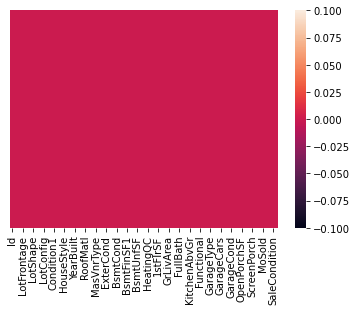

In [29]:
sns.heatmap(data.isnull(), yticklabels=False)
plt.show()

### Dropping Id(Non - Important Feature)

In [30]:
data.drop(['Id'],axis=1,inplace=True)

### Dataframe Shape

In [31]:
data.shape

(1460, 76)

### Writing the data after handling missing values to a new file

In [33]:
data.to_csv('train_after_missing_values.csv')